In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary packages
!pip install labelme2coco ultralytics

# Step 1: Convert Labelme JSON annotations to COCO format
import labelme2coco


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=26d21355335b5719a4271659fee9a6c0608e112c3983fd1f979aec5536530ad7
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [ ]:
import os

# Define paths
train_label_dir = "/content/drive/MyDrive/OrganizedDataset/train/labels"
train_image_dir = "/content/drive/MyDrive/OrganizedDataset/train/images"

# Check label files
print("\nLabel files in train folder:")
label_files = os.listdir(train_label_dir)
print(label_files[:5])  # Show first 5 label files

# Check if all label files have corresponding images
image_files = {os.path.splitext(f)[0] for f in os.listdir(train_image_dir)}
label_files_base = {os.path.splitext(f)[0] for f in os.listdir(train_label_dir)}

missing_images = label_files_base - image_files
missing_labels = image_files - label_files_base

print(f"\nLabels without corresponding images: {missing_images}")
print(f"Images without corresponding labels: {missing_labels}")



Label files in train folder:
['1709617292291.txt', '1709617534838.txt', '1709619358067.txt', '1709621100853.txt', '1709619811692.txt']

Labels without corresponding images: set()
Images without corresponding labels: set()


In [ ]:
import os

# Paths
train_image_dir = "/content/drive/MyDrive/OrganizedDataset/train/images"
val_image_dir = "/content/drive/MyDrive/OrganizedDataset/val/images"
train_label_dir = "/content/drive/MyDrive/OrganizedDataset/train/labels"
val_label_dir = "/content/drive/MyDrive/OrganizedDataset/val/labels"

# Check if directories exist
print("Checking directories...")
print("Train images directory exists:", os.path.isdir(train_image_dir))
print("Validation images directory exists:", os.path.isdir(val_image_dir))
print("Train labels directory exists:", os.path.isdir(train_label_dir))
print("Validation labels directory exists:", os.path.isdir(val_label_dir))

# List contents
print("\nTrain images:", os.listdir(train_image_dir)[:5])  # Show first 5 files
print("\nValidation images:", os.listdir(val_image_dir)[:5])
print("\nTrain labels:", os.listdir(train_label_dir)[:5])
print("\nValidation labels:", os.listdir(val_label_dir)[:5])


Checking directories...
Train images directory exists: True
Validation images directory exists: True
Train labels directory exists: True
Validation labels directory exists: True

Train images: ['1709634190942.jpg', '1709627939011.jpg', '1709617642044.jpg', '1709639236699.jpg', '1709635479138.jpg']

Validation images: ['1709628769434.jpg', '1709623734080.jpg', '1709626424597.jpg', '1709619401194.jpg', '1709627822607.jpg']

Train labels: ['1709617292291.txt', '1709617534838.txt', '1709619358067.txt', '1709621100853.txt', '1709619811692.txt']

Validation labels: ['1709617238375.txt', '1709619401194.txt', '1709620330090.txt', '1709619908813.txt', '1709622220187.txt']


In [ ]:
def verify_image_label_pairs(image_dir, label_dir):
    images = {os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))}
    labels = {os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')}

    missing_labels = images - labels
    extra_labels = labels - images

    print(f"Images without labels: {missing_labels}")
    print(f"Labels without images: {extra_labels}")

# Run for train and validation sets
print("Verifying train image-label pairs...")
verify_image_label_pairs(train_image_dir, train_label_dir)

print("\nVerifying validation image-label pairs...")
verify_image_label_pairs(val_image_dir, val_label_dir)


Verifying train image-label pairs...
Images without labels: set()
Labels without images: set()

Verifying validation image-label pairs...
Images without labels: set()
Labels without images: set()


In [ ]:
import os

# Rename the train and val labels directories
train_labels_yolo = "/content/drive/MyDrive/OrganizedDataset/train/labels_yolo"
val_labels_yolo = "/content/drive/MyDrive/OrganizedDataset/val/labels_yolo"

train_labels = "/content/drive/MyDrive/OrganizedDataset/train/labels"
val_labels = "/content/drive/MyDrive/OrganizedDataset/val/labels"

# Rename the directories
if os.path.exists(train_labels_yolo):
    os.rename(train_labels_yolo, train_labels)
    print(f"Renamed {train_labels_yolo} to {train_labels}")

if os.path.exists(val_labels_yolo):
    os.rename(val_labels_yolo, val_labels)
    print(f"Renamed {val_labels_yolo} to {val_labels}")


In [ ]:
# Verify the new structure
print("\nVerifying new structure:")
print("Train labels:", os.listdir(train_labels)[:5])  # Show first 5 train label files
print("Validation labels:", os.listdir(val_labels)[:5])  # Show first 5 val label files



Verifying new structure:
Train labels: ['1709617292291.txt', '1709617534838.txt', '1709619358067.txt', '1709621100853.txt', '1709619811692.txt']
Validation labels: ['1709617238375.txt', '1709619401194.txt', '1709620330090.txt', '1709619908813.txt', '1709622220187.txt']


In [ ]:
# Update dataset.yaml
yaml_path = "/content/dataset.yaml"

yaml_content = """
train: /content/drive/MyDrive/OrganizedDataset/train/images
val: /content/drive/MyDrive/OrganizedDataset/val/images

nc: 3
names: ['colorcard', 'bluecircle', 'palm']
"""

with open(yaml_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print("\nUpdated dataset.yaml file:")
with open(yaml_path, 'r') as f:
    print(f.read())



Updated dataset.yaml file:

train: /content/drive/MyDrive/OrganizedDataset/train/images
val: /content/drive/MyDrive/OrganizedDataset/val/images

nc: 3
names: ['colorcard', 'bluecircle', 'palm']



In [ ]:
# Clear cache files
!rm -f /content/drive/MyDrive/OrganizedDataset/train/labels.cache
!rm -f /content/drive/MyDrive/OrganizedDataset/val/labels.cache

from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8n.pt')  # YOLOv8 nano

# Train the model
model.train(
    data='/content/dataset.yaml',  # Path to updated dataset.yaml
    epochs=50,                     # Number of epochs
    imgsz=1024,                    # Image size
    verbose=True                   # Enable verbose logging
)

# Validate the model
print("\nValidating the model...")
model.val(data='/content/dataset.yaml', imgsz=1024)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 180MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 137MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/OrganizedDataset/train/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [02:14<00:00,  1.68s/it]

train: New cache created: /content/drive/MyDrive/OrganizedDataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/OrganizedDataset/val/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:34<00:00,  1.65s/it]

val: New cache created: /content/drive/MyDrive/OrganizedDataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.49G       1.31      3.658      1.683         76       1024: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         21         63    0.00795      0.587     0.0188    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.23G       1.15      3.389      1.553         96       1024: 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         21         63     0.0105      0.683      0.481      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.19G      0.875      2.389      1.405         94       1024: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         21         63     0.0134       0.73      0.562       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.25G     0.8819      1.771      1.352         86       1024: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         21         63      0.018      0.762      0.511      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.26G     0.7958      1.562      1.282         82       1024: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         21         63     0.0162      0.762      0.531      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.23G     0.8175      1.441      1.312         74       1024: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         21         63          1      0.288      0.632      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.24G     0.8296      1.351      1.299        101       1024: 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         21         63      0.995      0.409      0.611      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.25G     0.8158      1.343      1.326         84       1024: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         21         63      0.969      0.617      0.645      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.26G     0.7875       1.22      1.236        102       1024: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         21         63      0.847      0.444      0.603      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.24G     0.8306      1.207      1.289         82       1024: 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         21         63      0.969      0.613      0.957       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.25G     0.7665      1.133      1.226         94       1024: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         21         63      0.947      0.564        0.9      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.26G     0.7808      1.132      1.264         70       1024: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         21         63      0.976      0.619      0.904      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.25G     0.8444      1.117      1.247         72       1024: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         21         63      0.958       0.64      0.913      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.24G     0.8049      1.149      1.269         99       1024: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         21         63      0.933      0.651      0.975      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.24G     0.7874      1.068      1.212         98       1024: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         21         63      0.892      0.635      0.923      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.25G     0.7712      1.023      1.188        104       1024: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         21         63      0.866      0.587      0.863      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.24G     0.7808      1.056      1.232         84       1024: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         21         63      0.895      0.736      0.975      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.26G     0.8034      1.048      1.257         69       1024: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         21         63      0.815      0.634      0.881      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.26G     0.7875      1.012      1.224         91       1024: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         21         63      0.756      0.586      0.819       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.24G     0.7853      1.021      1.246         88       1024: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         21         63      0.851      0.896      0.979      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.24G      0.759      1.009      1.217         94       1024: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         21         63      0.867      0.901       0.98      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.26G     0.7087     0.9104      1.153         91       1024: 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         21         63      0.881      0.986      0.983      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.26G     0.7036     0.8938       1.16         85       1024: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         21         63      0.802      0.988      0.975      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.26G     0.7722      0.991      1.231         77       1024: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         21         63      0.781      0.967      0.967      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.25G     0.7408     0.9128      1.169         90       1024: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         21         63      0.884      0.965      0.984      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.25G     0.6861     0.8743      1.153        100       1024: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         21         63      0.952      0.977      0.989      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.24G     0.7164     0.9115      1.187         78       1024: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         21         63      0.959      0.968      0.994      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.24G     0.6988     0.8883      1.163         88       1024: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         21         63      0.986      0.997      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.24G     0.6729     0.8584      1.126         87       1024: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         21         63      0.991      0.998      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.24G     0.7107     0.8743      1.203         75       1024: 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         21         63      0.991      0.999      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.24G     0.6864     0.8769      1.171         89       1024: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         21         63      0.986          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.24G     0.6452     0.8228      1.134         96       1024: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         21         63      0.988          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.25G     0.6859     0.8157      1.148         96       1024: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         21         63      0.994          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.26G      0.657     0.7746        1.1        107       1024: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         21         63      0.991          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.26G       0.68     0.7967      1.136        102       1024: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         21         63      0.986          1      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.26G     0.6524     0.7886      1.133         82       1024: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         21         63      0.991          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.26G     0.6356     0.7508      1.093        101       1024: 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         21         63      0.993          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.26G       0.64     0.7896      1.163         85       1024: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         21         63      0.994          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.26G     0.6696     0.7688      1.132        101       1024: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         21         63      0.993          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.26G     0.6412     0.7514      1.105         80       1024: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         21         63      0.992          1      0.995      0.798


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.16G      0.673      1.006      1.181         48       1024: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         21         63      0.989          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.16G     0.6383     0.9753       1.17         48       1024: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         21         63      0.989          1      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.15G     0.6088       0.94      1.121         48       1024: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         21         63      0.993          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.15G     0.5719     0.8985      1.083         48       1024: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         21         63      0.989          1      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.16G     0.6059     0.9228      1.105         48       1024: 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         21         63      0.992          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.15G     0.5929     0.8995      1.086         48       1024: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         21         63      0.996          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.16G     0.5819     0.8911      1.107         48       1024: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         21         63      0.995          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.15G     0.5738     0.8741       1.09         48       1024: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         21         63      0.994          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.16G     0.5651     0.8634      1.118         48       1024: 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         21         63      0.994          1      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.15G     0.5503     0.8481      1.059         48       1024: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         21         63      0.995          1      0.995      0.792



50 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


                   all         21         63      0.992          1      0.995      0.798
             colorcard         21         21      0.987          1      0.995      0.927
            bluecircle         21         21      0.997          1      0.995      0.736
                  palm         21         21      0.991          1      0.995      0.733
Speed: 0.5ms preprocess, 5.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train

Validating the model...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/OrganizedDataset/val/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


                   all         21         63      0.992          1      0.995      0.796
             colorcard         21         21      0.987          1      0.995      0.927
            bluecircle         21         21      0.997          1      0.995      0.723
                  palm         21         21      0.991          1      0.995      0.739
Speed: 0.6ms preprocess, 24.5ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd9fe6a2470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

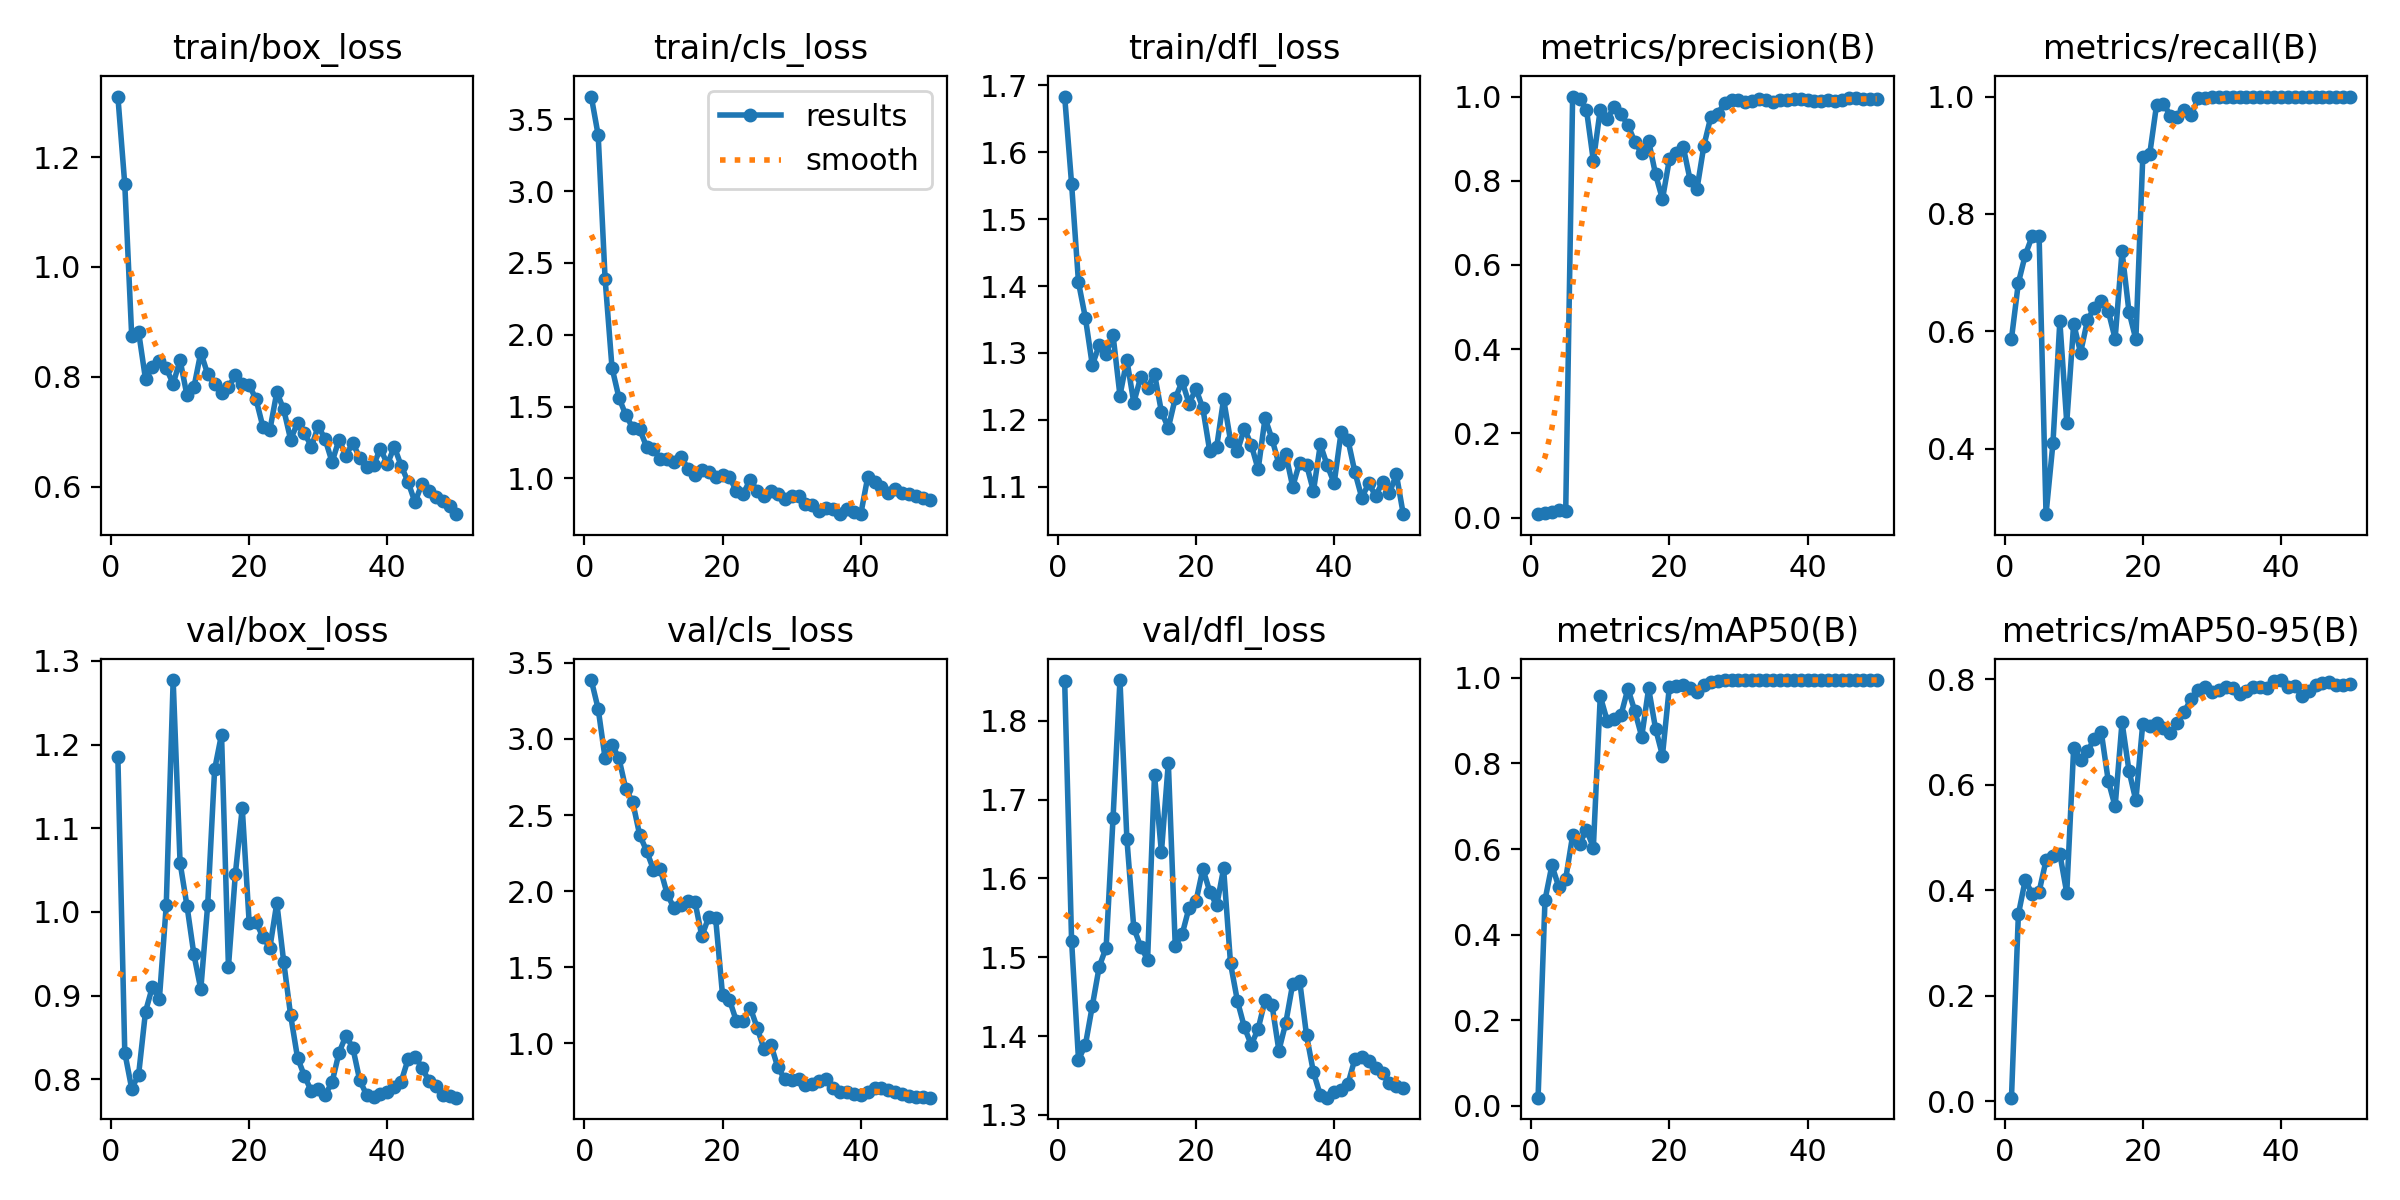

In [ ]:
display(Image(filename='runs/detect/train/results.png'))

In [ ]:
import os

# Check the runs/detect directory
runs_path = "runs/detect"
print("Contents of runs/detect:")
print(os.listdir(runs_path))

# Check specific training folders
train6_path = os.path.join(runs_path, "train6")
if os.path.exists(train6_path):
    print("\nContents of train6/weights:")
    print(os.listdir(os.path.join(train6_path, "weights")))
else:
    print("\ntrain6 directory does not exist. Check other folders under runs/detect.")


Contents of runs/detect:
['train', 'train2']

train6 directory does not exist. Check other folders under runs/detect.


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# Load the trained model (use the correct path to best.pt)
model = YOLO('runs/detect/train/weights/best.pt')

# Run inference on a test image
results = model.predict(source='/content/drive/My Drive/mom.png', save=True, imgsz=1024)



image 1/1 /content/drive/My Drive/mom.png: 1024x896 1 palm, 36.9ms
Speed: 6.3ms preprocess, 36.9ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 896)
Results saved to runs/detect/predict


In [ ]:
from ultralytics import YOLO
import os
import shutil

# Path to the model and images
model_path = 'runs/detect/train/weights/best.pt'
input_folder = '/content/drive/My Drive/ANEMIA/Left_Palm_files/Images_left_palm'
output_folder = '/content/drive/My Drive/ANEMIA/Predictions'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load the YOLO model
model = YOLO(model_path)

# Run inference on all images in the input folder with a confidence threshold of 0.75
for file_name in os.listdir(input_folder):
    if file_name.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
        input_path = os.path.join(input_folder, file_name)

        # Run inference with confidence threshold
        results = model.predict(source=input_path, save=True, imgsz=1024, conf=0.65)

        # Get the directory where predictions are saved
        predicted_image_path = os.path.join(model.predictor.save_dir, file_name)

        # Move the predicted image to the output folder
        if os.path.exists(predicted_image_path):
            shutil.move(predicted_image_path, os.path.join(output_folder, file_name))
        else:
            print(f"Prediction not found for {file_name}. Check the model output.")

print(f"Predictions saved to: {output_folder}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ANEMIA/Left_Palm_files/Images_left_palm'

In [ ]:
import os
import pandas as pd
import shutil
from ultralytics import YOLO
import cv2
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Paths
excel_path = "/content/drive/My Drive/ANEMIA/Anemia_dataset_train.xlsx"
left_palm_images = "/content/drive/My Drive/palm images/Left_Palm_files/Images_left_palm"
right_palm_images = "/content/drive/My Drive/palm images/Right_Palm_files/Images_right_palm"
output_split_folder = "/content/drive/My Drive/palm images/SplitDataset"
cropped_images_folder = "/content/drive/My Drive/palm images/CroppedPalms"
model_weights_path = "runs/detect/train/weights/best.pt"  # Replace with your trained YOLO model path

# Load Hemoglobin Data
hb_data_left = pd.read_excel(excel_path, sheet_name="Left_Palm_Data")
hb_data_right = pd.read_excel(excel_path, sheet_name="Right_Palm_Data")

# Combine Left and Right Palm Data
hb_data_left["Image_Name"] = hb_data_left["Left_Palm_Images"].str.strip()
hb_data_right["Image_Name"] = hb_data_right["Right_Palm_Images"].str.strip()
hb_data = pd.concat([hb_data_left[["Image_Name", "Hb_Value"]],
                     hb_data_right[["Image_Name", "Hb_Value"]]],
                    ignore_index=True)

# 1. Split Dataset into Train, Validation, Test
def split_dataset(image_folder, output_folder, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    os.makedirs(output_folder, exist_ok=True)
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(output_folder, split), exist_ok=True)

    images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
    total_images = len(images)

    train_count = int(total_images * train_ratio)
    val_count = int(total_images * val_ratio)

    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    for split, split_images in zip(["train", "val", "test"], [train_images, val_images, test_images]):
        for img in split_images:
            shutil.copy(os.path.join(image_folder, img), os.path.join(output_folder, split))

# Combine left and right palm images into one folder for splitting
combined_images_folder = "/content/drive/My Drive/palm images/CombinedPalmImages"
os.makedirs(combined_images_folder, exist_ok=True)
for img_folder in [left_palm_images, right_palm_images]:
    for img_file in os.listdir(img_folder):
        shutil.copy(os.path.join(img_folder, img_file), combined_images_folder)

# Run split for combined dataset
split_dataset(combined_images_folder, output_split_folder)

# 2. Run YOLO to Crop Palms
def crop_palms_with_yolo(image_folder, output_folder, model_path):
    model = YOLO(model_path)
    os.makedirs(output_folder, exist_ok=True)
    for img_file in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_file)
        if not img_file.endswith(('.jpg', '.png')):
            continue

        results = model.predict(source=img_path, conf=0.75, save=False, imgsz=1024)

        if len(results) > 0 and len(results[0].boxes) == 1:  # Ensure exactly one palm detected
            box = results[0].boxes[0]
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert box coordinates
            img = cv2.imread(img_path)
            cropped_img = img[y1:y2, x1:x2]
            output_path = os.path.join(output_folder, img_file)
            cv2.imwrite(output_path, cropped_img)

# Crop palms for the combined dataset
for split in ["train", "val", "test"]:
    crop_palms_with_yolo(os.path.join(output_split_folder, split),
                         os.path.join(cropped_images_folder, split),
                         model_weights_path)

# 3. Match Cropped Images with Hemoglobin Values
def match_images_with_hb(cropped_folder, hb_data):
    hb_mapping = {}
    for img_name in os.listdir(cropped_folder):
        base_name = os.path.splitext(img_name)[0]
        match = hb_data[hb_data["Image_Name"] == img_name]
        if not match.empty:
            hb_mapping[os.path.join(cropped_folder, img_name)] = match["Hb_Value"].values[0]
    return hb_mapping

train_mapping = match_images_with_hb(os.path.join(cropped_images_folder, "train"), hb_data)
val_mapping = match_images_with_hb(os.path.join(cropped_images_folder, "val"), hb_data)
test_mapping = match_images_with_hb(os.path.join(cropped_images_folder, "test"), hb_data)

# 4. Train Deep Learning Model
class PalmDataset(Dataset):
    def __init__(self, mapping, transform=None):
        self.mapping = list(mapping.items())
        self.transform = transform

    def __len__(self):
        return len(self.mapping)

    def __getitem__(self, idx):
        img_path, hb_value = self.mapping[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(hb_value, dtype=torch.float32)

# Define Transforms and DataLoaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = PalmDataset(train_mapping, transform=transform)
val_dataset = PalmDataset(val_mapping, transform=transform)
test_dataset = PalmDataset(test_mapping, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define and Train Model
class MobileNetHbModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
        self.model.classifier[1] = nn.Linear(self.model.last_channel, 1)

    def forward(self, x):
        return self.model(x)

model = MobileNetHbModel().to('cuda')
criterion = nn.MSELoss()  # RMSE will be sqrt(MSE)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(50):  # Adjust epoch count as needed
    model.train()
    for imgs, hb_values in train_loader:
        imgs, hb_values = imgs.to('cuda'), hb_values.to('cuda')
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs.squeeze(), hb_values)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Validation and Test Loop with RMSE and MAE
model.eval()
def evaluate(loader, description="Validation"):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for imgs, hb_values in loader:
            imgs, hb_values = imgs.to('cuda'), hb_values.to('cuda')
            outputs = model(imgs).squeeze()
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(hb_values.cpu().numpy())
    rmse = np.sqrt(mean_squared_error(all_labels, all_preds))
    mae = mean_absolute_error(all_labels, all_preds)
    print(f"{description} RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return rmse, mae

evaluate(val_loader, "Validation")
evaluate(test_loader, "Test")

# Save the model
torch.save(model.state_dict(), "/content/drive/My Drive/palm images/Hb_model.pth")
